# <font color="gren">**Trabalho final Sinais e Sistemas**

## <font color="gren"> **Alunos:**
* Pedro Gasparelo Leme - 14602421
* Vitor Alexandre Garcia Vaz - 14611432

## <font color="green">**Solução: Plotagem da convolução de sinais**

## **Imports necessários**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


## **Função modelo de uma integração**

### Integral de uma função pelo método de Simpson

In [11]:
def intg_s(a,b,N,f):
    ## Calcula tamanho das partições
    h=(b-a)/N

    ## Somatório da fórmula
    som=0 

    x=np.zeros(N+1)
    x[0]=a

    ## Valores de x a cada partição h
    for k in range(1,N+1):
        x[k]=a+h*k 
    
    ## Cálculo do somatório
    for k in range (1,N+1):
        xb=(x[k-1]+x[k])/2
        som=som+f(x[k-1])+4*f(xb)+f(x[k]) 

    ## Retorno do resultado da integral
    return ((h/6)*som)

## **Convolução em si**
### Utilizando método de Simpson para integração:


$$
conv(a,b,N,f,g,x) = f(x)*g(x) = \int_a^b f(t)g(x - t) \,dt
$$

* com N partições de tamanho (b-a)/N

Vale lembrar que estamos considerando, na convolução, uma integração de a a b em vez de $-\infty$ a $+\infty$ para permitir o cálculo da integral utilizando partições.

Nesse sentido, para realizar a convolução de maneira rigorosa, é necessário saber os domínios de ambos os sinais e, com base na intersecção desses domínios, definir os limites de integração a e b que se aproximam de $-\infty$ a $+\infty$, respectivamente.

In [12]:
def conv(a,b,N,f,g,x):
    
    ## Calcula tamanho das partições
    h=(b-a)/N 
    
    ## Somatório da fórmula
    som=0 

    t=np.zeros(N+1)
    t[0]=a

    ## Valores de t a cada partição h
    for k in range(1,N+1):
        t[k]=a+h*k 
    
    ## Cálculo do somatório
    for k in range (1,N+1):
        tb=(t[k-1]+t[k])/2
        som += f(t[k-1])*g(x-t[k-1]) + 4*f(tb)*g(x-tb)+ f(t[k])*g(x-t[k]) 

    ## Retorno do resultado da convolução no ponto x
    return ((h/6)*som)

## **Plotagem**

### **1 - Convolução de dois sinais Gate $G_{10}(t)$**

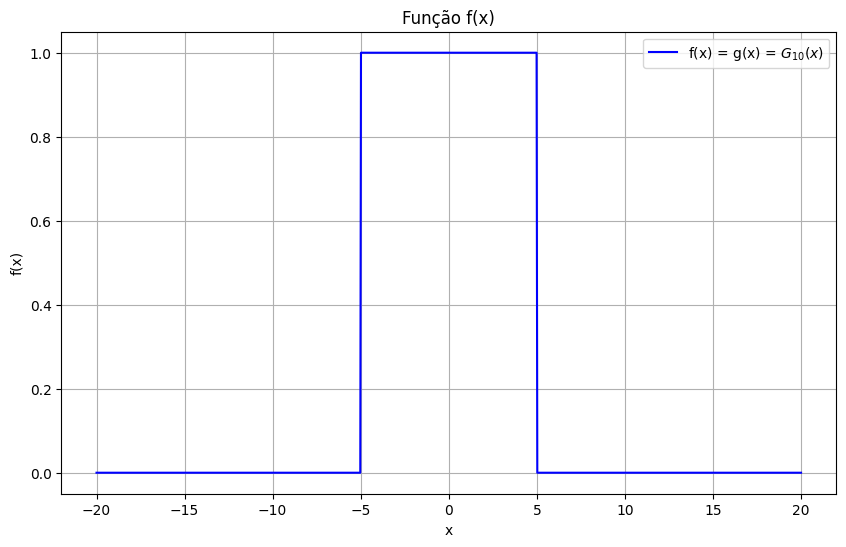

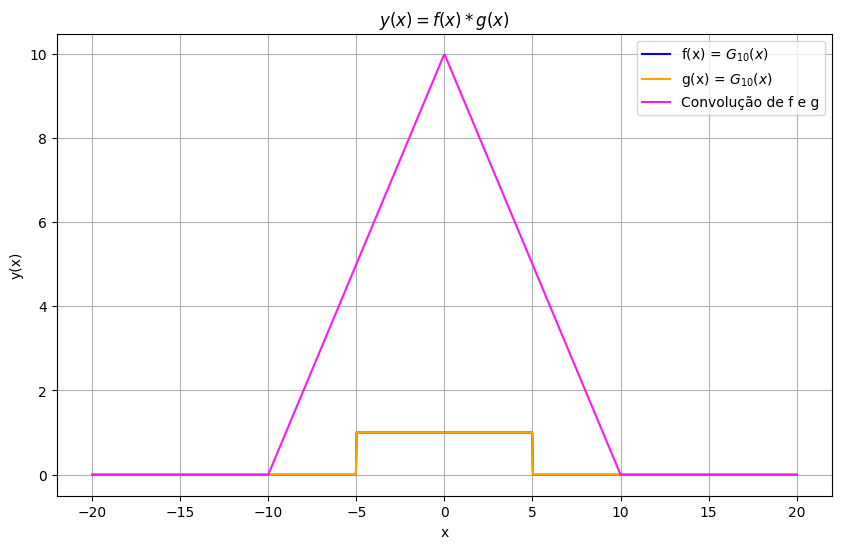

In [13]:
# Definindo as funções f e g
def f1(t):
    if(abs(t) <= 5):
        return 1
    return 0

def g1(t):
    if(abs(t) <= 5):
        return 1
    return 0

# Parâmetros
a = -20         # limite inferior 
b = 20          # limite superior
N = 1000        # número de partições

# Definindo os valores de x
x_values = np.linspace(a, b, N)

# Calculando a convolução para cada valor de x
i = 0
conv_values = np.zeros(N)
for x in x_values:
    conv_values[i] = conv(a,b,N,f1,g1,x)
    i += 1

# Plotando f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f1(x) for x in x_values], label='f(x) = g(x) = $G_{10}(x)$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função f(x)')
plt.legend()
plt.grid(True)

# Salvamento do gráfico
plt.savefig('graficos_plotados/funcao_f1.png')

# Exibição do gráfico
plt.show()

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f1(x) for x in x_values], label='f(x) = $G_{10}(x)$', color='blue')
plt.plot(x_values, [g1(x) for x in x_values], label='g(x) = $G_{10}(x)$', color='orange')
plt.plot(x_values, conv_values, label='Convolução de f e g', color='#fa19ef')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('$y(x) = f(x) * g(x)$')
plt.legend()
plt.grid(True)

# Salvamento do gráfico
plt.savefig('graficos_plotados/convolucao1.png')

# Exibição do gráfico
plt.show()



### **2 - Convolução de um sinal rampa e de um gate $G_5(x)$**

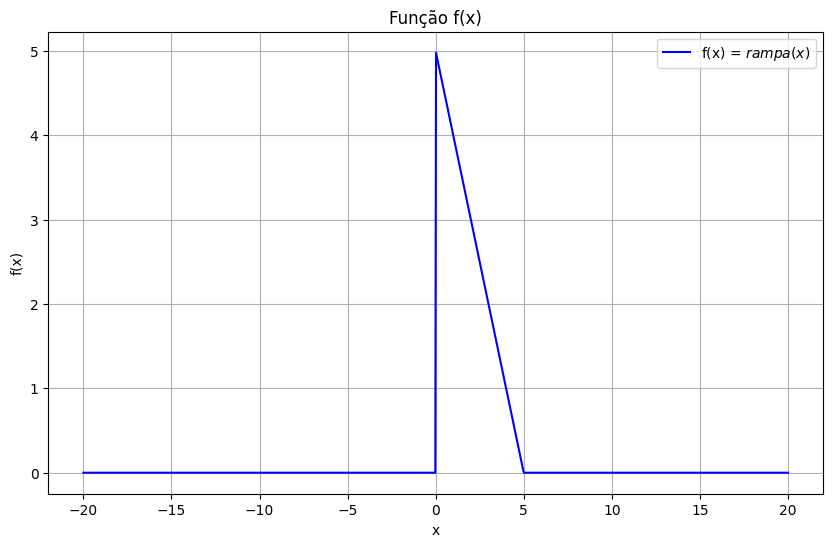

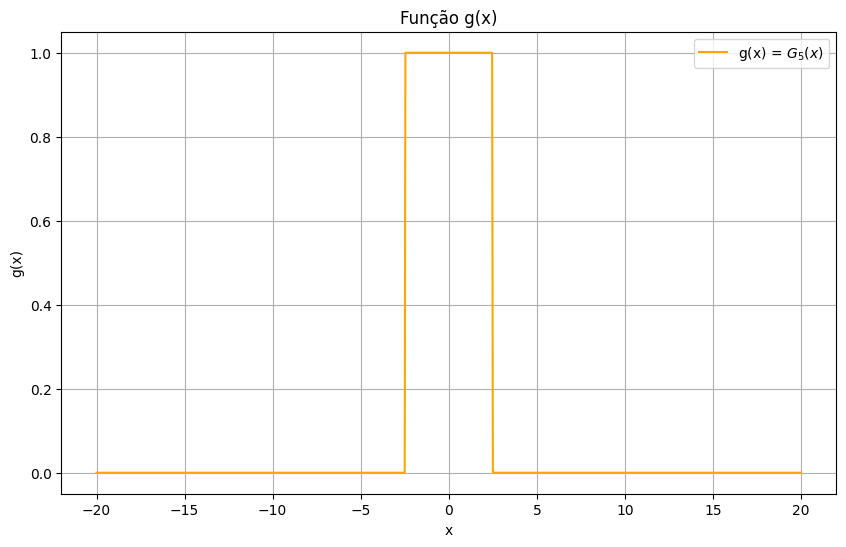

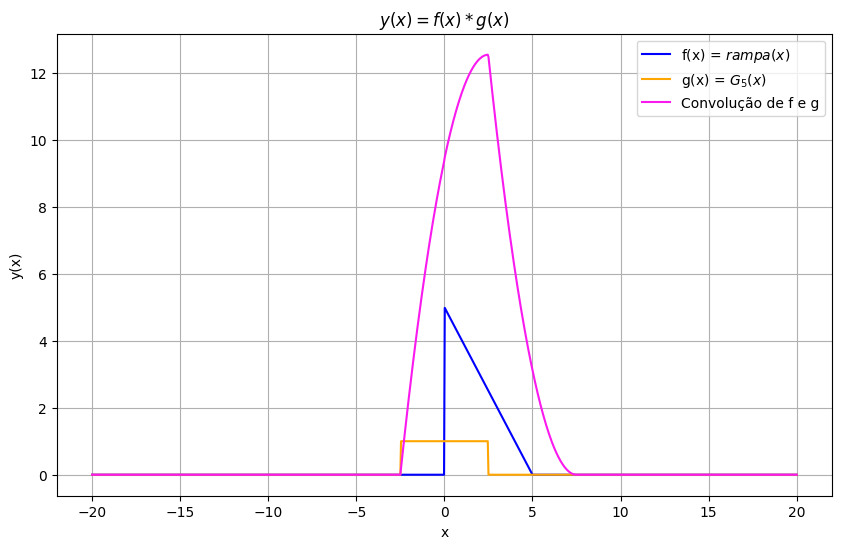

In [14]:
# Definindo as funções f e g
def f2(t):
    if( t >= 0 and t <= 5 ):
        return 5 - t
    return 0

def g2(t):
    if(abs(t) <= 2.5):
        return 1
    return 0

# Parâmetros
a = -20         # limite inferior 
b = 20          # limite superior
N = 1000        # número de partições

# Definindo os valores de x
x_values = np.linspace(a, b, N)

# Calculando a convolução para cada valor de x
i = 0
conv_values = np.zeros(N)
for x in x_values:
    conv_values[i] = conv(a,b,N,f2,g2,x)
    i += 1

# Plotando f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f2(x) for x in x_values], label='f(x) = $rampa(x)$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função f(x)')
plt.legend()
plt.grid(True)
# Salvamento do gráfico
plt.savefig('graficos_plotados/funcao_f2.png')
# Exibição do gráfico
plt.show()

# Plotando g(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, [g2(x) for x in x_values], label='g(x) = $G_5(x)$', color='orange')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Função g(x)')
plt.legend()
plt.grid(True)
# Salvamento do gráfico
plt.savefig('graficos_plotados/funcao_g2.png')
# Exibição do gráfico
plt.show()

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f2(x) for x in x_values], label='f(x) = $rampa(x)$', color='blue')
plt.plot(x_values, [g2(x) for x in x_values], label='g(x) = $G_5(x)$', color = 'orange')
plt.plot(x_values, conv_values, label='Convolução de f e g', color='#fa19ef')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('$y(x) = f(x) * g(x)$')
plt.legend()
plt.grid(True)

# Salvamento do gráfico
plt.savefig('graficos_plotados/convolucao2.png')

# Exibição do gráfico
plt.show()



### **3 - Convolução de $f(x)=e^{x}u(-x)$ e de $g(x)=e^{-x}u(x)$**

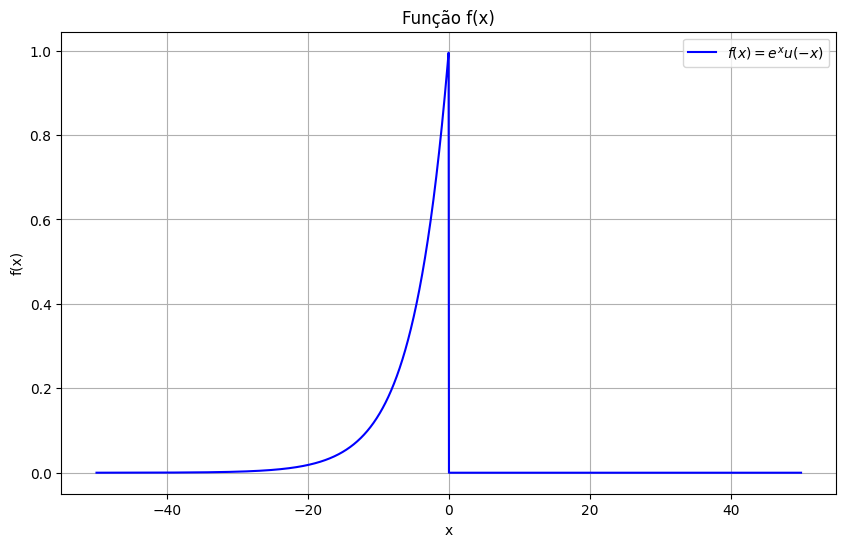

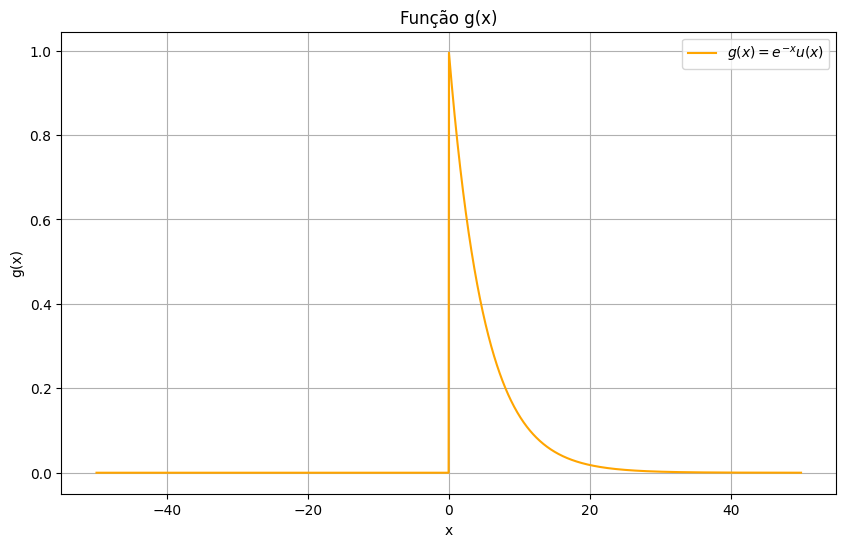

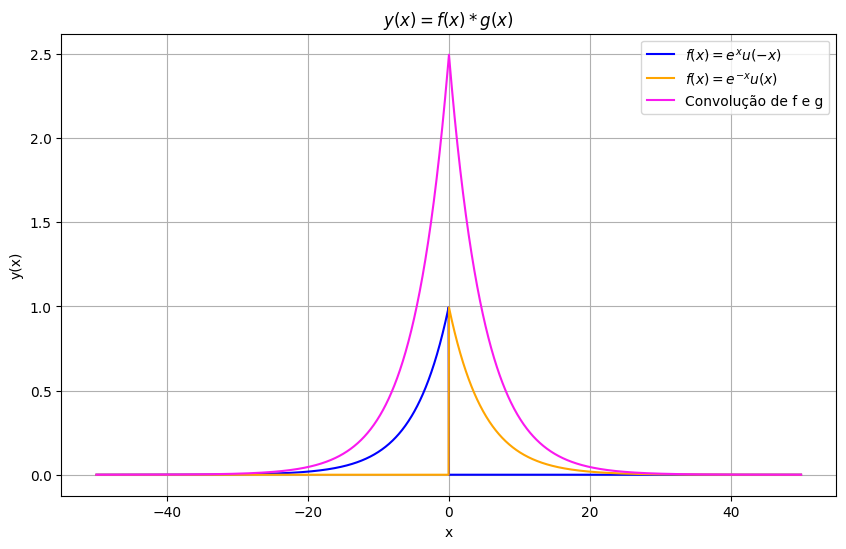

In [15]:
# Definindo as funções f e g
def f3(t):
    if(t <= 0):
        return math.exp(0.2*t) 
    return 0

def g3(t):
    if(t >= 0):
        return math.exp(-0.2*t) 
    return 0

# Parâmetros
a = -50         # limite inferior 
b = 50          # limite superior
N = 2000        # número de partições

# Definindo os valores de x
x_values = np.linspace(a, b, N)

# Calculando a convolução para cada valor de x
i = 0
conv_values = np.zeros(N)
for x in x_values:
    conv_values[i] = conv(a,b,N,f3,g3,x)
    i += 1

# Plotando f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f3(x) for x in x_values], label='$f(x)=e^{x}u(-x)$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função f(x)')
plt.legend()
plt.grid(True)
# Salvamento do gráfico
plt.savefig('graficos_plotados/funcao_f3.png')
# Exibição do gráfico
plt.show()

# Plotando g(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, [g3(x) for x in x_values], label='$g(x)=e^{-x}u(x)$', color='orange')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Função g(x)')
plt.legend()
plt.grid(True)
# Salvamento do gráfico
plt.savefig('graficos_plotados/funcao_g3.png')
# Exibição do gráfico
plt.show()

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f3(x) for x in x_values], label='$f(x)=e^{x}u(-x)$', color='blue')
plt.plot(x_values, [g3(x) for x in x_values], label='$f(x)=e^{-x}u(x)$', color = 'orange')
plt.plot(x_values, conv_values, label='Convolução de f e g', color='#fa19ef')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('$y(x) = f(x) * g(x)$')
plt.legend()
plt.grid(True)

# Salvamento do gráfico
plt.savefig('graficos_plotados/convolucao3.png')

# Exibição do gráfico
plt.show()

